# Understanding Data

**Understanding Data** adalah proses memahami, menganalisis, dan menginterpretasikan data agar dapat digunakan secara efektif dalam pengambilan keputusan. Proses ini mencakup pengumpulan data dari berbagai sumber, pembersihan data untuk menghapus ketidakkonsistenan, analisis data dengan teknik statistik atau visualisasi untuk menemukan pola, serta interpretasi hasil guna mendukung keputusan yang lebih baik. Selain itu, komunikasi data melalui grafik, laporan, atau dashboard juga penting agar wawasan yang diperoleh dapat dipahami oleh pemangku kepentingan. Memahami data sangat krusial dalam berbagai bidang, termasuk teknik, bisnis, sains, dan kecerdasan buatan.



## Pengumpulan Data

Kami telah melakukan proses pengumpulan data dan menyimpannya di Aiven.io, yang digunakan sebagai sumber data dari berbagai database. Dalam tahap ini, sangat penting untuk memastikan bahwa data yang dikumpulkan sesuai dengan tujuan analisis dan memiliki relevansi yang tinggi.

## Install Package untuk MySQL dan PosgreSQL

In [ ]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas tabulate


## Koneksi ke Database Mysql dan PosgreSQL melalui dari aiven.io

### Koneksi ke PosgreSQL dan menampilkan datanya

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

try:
    # Membuat koneksi
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |
|   1 |    2 | Iris-setosa     |            4.9 |           3   |
|   2 |    3 | Iris-setosa     |            4.7 |           3.2 |
|   3 |    4 | Iris-setosa     |            4.6 |           3.1 |
|   4 |    5 | Iris-setosa     |            5   |           3.6 |
|   5 |    6 | Iris-setosa     |            5.4 |           3.9 |
|   6 |    7 | Iris-setosa     |            4.6 |           3.4 |
|   7 |    8 | Iris-setosa     |            5   |           3.4 |
|   8 |    9 | Iris-setosa     |            4.4 |           2.9 |
|   9 |   10 | Iris-setosa     |            4.9 |           3.1 |
|  10 |   11 | Iris-setosa     |            5.4 |           3.7 |
|  11 |   12 | Iris-setosa     |            4.8 |           3.4 |
|  12 |   

### Koneksi ke MySQL dan menampilkan datanya

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.flowers;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | petal length   | petal width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           |
| 2    | Iris-setosa    | 1.4            | 0.2           |
| 3    | Iris-setosa    | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           |
| 149  | Iris-virginica | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.1            | 1.8           |
+------+----------------+----------------+---------------+


## Sampling data

Sampling data digunakan untuk menganalisis sebagian data tanpa perlu memproses seluruh dataset. Pada tahap ini, data dikelompokkan berdasarkan kelasnya dengan warna yang berbeda, yaitu Iris-setosa berwarna biru, Iris-versicolor berwarna merah, dan Iris-virginica berwarna hijau. Pengelompokan ini bertujuan untuk mempermudah visualisasi dan analisis data.

## Profiling Data  

Profiling data adalah proses merangkum setiap variabel dalam dataset, termasuk jenis data yang digunakan. Proses ini juga mencakup pemeriksaan, pemahaman, dan analisis terhadap struktur serta kualitas data untuk memastikan data siap digunakan dalam analisis lebih lanjut.s struktur serta kualitas data sebelum digunakan dalam analisis lebih lanjut.

### Menarik data base dari PosgreSql dan Mysql menjadi 1 tabel sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

# Koneksi MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM irismysql.flowers;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

## Visualisasi Data

Dalam analisis dataset, visualisasi data digunakan untuk memahami, mengeksplorasi, dan menampilkan pola yang ada dalam data. Dengan bantuan visualisasi, tren, hubungan antar fitur, serta distribusi data dapat lebih mudah dikenali. Penyajian data dalam bentuk grafik atau diagram membantu mempercepat proses analisis dan memberikan pemahaman yang lebih mendalam.

## Korelasi dan Asosiasi

Korelasi dan asosiasi merupakan proses menghitung koefisien korelasi guna menilai hubungan linier antara variabel. Tujuan dari analisis ini adalah untuk memahami keterkaitan antar variabel dalam dataset serta menentukan sejauh mana suatu variabel dapat memengaruhi variabel lainnya.

## Eksplorasi Data

Tahap eksplorasi data dilakukan sebagai langkah awal dalam analisis untuk memahami karakteristik, distribusi, dan pola dalam suatu dataset. Proses ini mencakup perhitungan statistik seperti mean, median, modus, standar deviasi, serta nilai minimum dan maksimum. Selain itu, penggunaan visualisasi data seperti histogram dan scatter plot membantu dalam mengidentifikasi pola atau tren yang mungkin muncul.

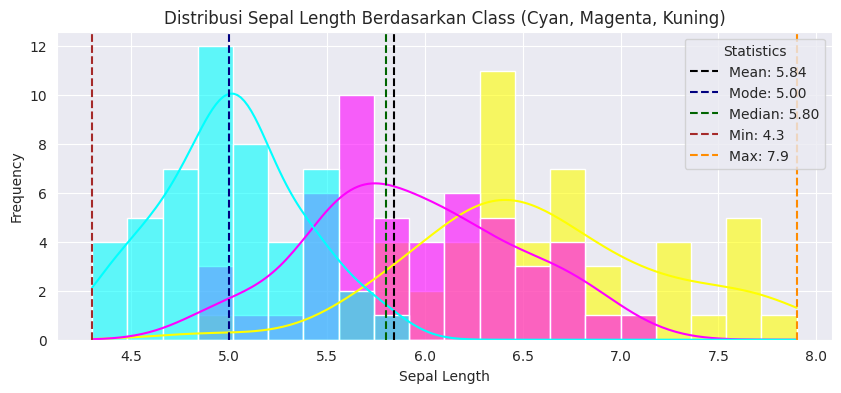

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "cyan",
    "Iris-versicolor": "magenta",
    "Iris-virginica": "yellow"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="navy", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="darkgreen", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="brown", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="darkorange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Length Berdasarkan Class (Cyan, Magenta, Kuning)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


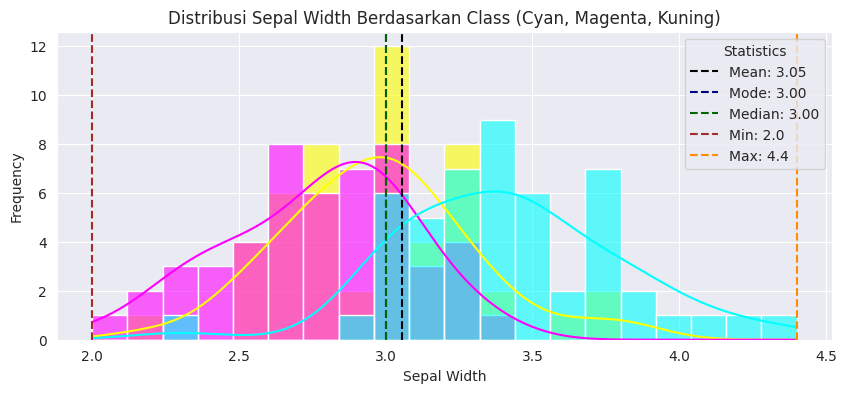

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "cyan",
    "Iris-versicolor": "magenta",
    "Iris-virginica": "yellow"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="navy", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="darkgreen", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="brown", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="darkorange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Width Berdasarkan Class (Cyan, Magenta, Kuning)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


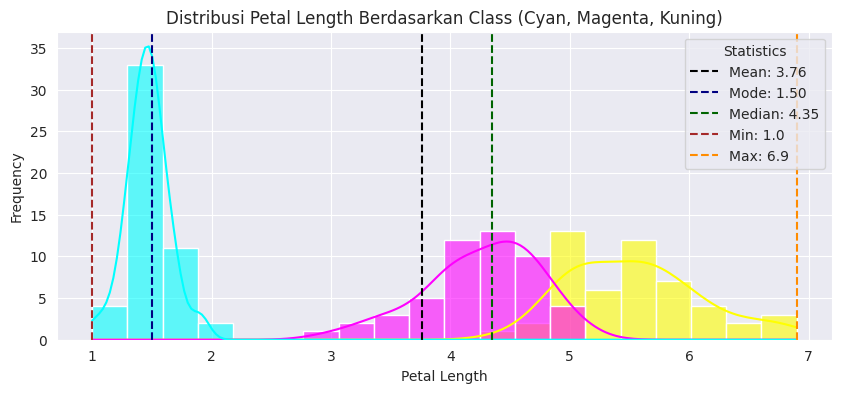

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "cyan",
    "Iris-versicolor": "magenta",
    "Iris-virginica": "yellow"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="navy", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="darkgreen", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="brown", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="darkorange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Length Berdasarkan Class (Cyan, Magenta, Kuning)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


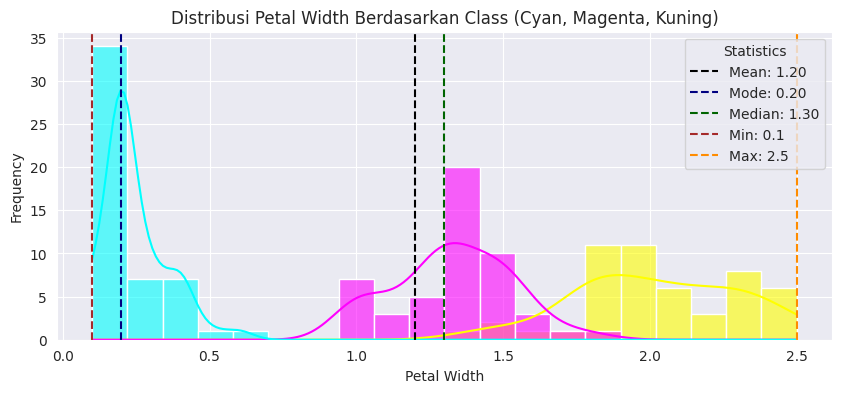

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "cyan",
    "Iris-versicolor": "magenta",
    "Iris-virginica": "yellow"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="navy", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="darkgreen", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="brown", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="darkorange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Width Berdasarkan Class (Cyan, Magenta, Kuning)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


## Indentifikasi Masalah Data

merupakan proses memahami kualitas data dan memastikan bahwa data yang akan kita analisis atau gunakan dalam model machine learning sudah bersih, lengkap, dan sesuai format yang diharapkan. Hal yang perlu diperhatikan adalah:

- Missing Values: Menemukan data yang hilang atau tidak lengkap.
- Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
- Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
- Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

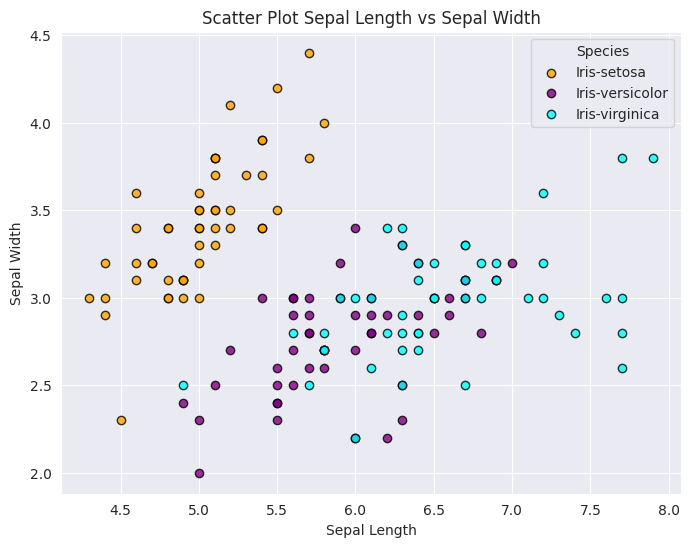

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom sesuai
x_col = "sepal length"
y_col = "sepal width"
class_col = "class"

# Warna baru untuk setiap spesies
colors = {"Iris-setosa": "orange", "Iris-versicolor": "purple", "Iris-virginica": "cyan"}

plt.figure(figsize=(8, 6))

# Scatter plot dengan warna berdasarkan kelas
for species, color in colors.items():
    subset = combined_df[combined_df[class_col] == species]
    plt.scatter(subset[x_col], subset[y_col], label=species, color=color, alpha=0.8, edgecolors="black")

# Label sumbu
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot Sepal Length vs Sepal Width")

# Tambahkan legenda
plt.legend(title="Species")

# Tampilkan plot
plt.show()


## Validasi data

Validasi data dilakukan untuk memastikan bahwa data yang digunakan bersih, lengkap, dan sesuai sebelum dianalisis atau divisualisasikan dan memastikan apakah data memcerminkan realitas atau fenomena yang ingin dipelajari